###Env to use: birdnet

In [18]:
import librosa
from skimage import feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import soundfile as sf
import os
from pathlib import Path
from sklearn.metrics import average_precision_score


In [19]:
from birdnetlib import Recording
from birdnetlib.analyzer import Analyzer
from datetime import datetime

# Load and initialize the BirdNET-Analyzer models.
analyzer = Analyzer()

Labels loaded.
load model True
Model loaded.
Labels loaded.
load_species_list_model
Meta model loaded.


Predict for positive segments first

In [20]:
output_folder='C:/Users/dgnhk/Woodcock-CNN/data/train_data/audio/1/'
wav_files = os.listdir(output_folder)

In [21]:
predictions = dict.fromkeys(wav_files, 0.0)

In [22]:
for file in wav_files:
    audio_path = Path(os.path.join(output_folder, file))
    recording = Recording(
        analyzer,
        audio_path,
        min_conf=0.0
    )
    recording.analyze()
    for detection in recording.detections:
        if detection['scientific_name']=='Scolopax rusticola':
            predictions[file] = detection['confidence']

read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording XC891756 - Eurasian Woodcock - Scolopax rusticola_0.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording XC891756 - Eurasian Woodcock - Scolopax rusticola_12.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording XC891756 - Eurasian Woodcock - Scolopax rusticola_15.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording XC891756 - Eurasian Woodcock - Scolopax rusticola_18.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording XC891756 - Eurasian Woodcock - Scolopax rusticola_21.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording XC891756 - Eurasian Woodcock - Scolopax rusticola_3.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording XC891756 - Eurasian Woodcock - Scolopax rusticola_6.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyz

In [23]:
np.mean(list(predictions.values()))

0.6810015722692846

Predict for negative segments

In [24]:
output_folder='C:/Users/dgnhk/Woodcock-CNN/data/train_data/audio/0/'
wav_files = os.listdir(output_folder)

In [25]:
predictions.update(dict.fromkeys(wav_files, 0.0))

In [26]:
for file in wav_files:
    audio_path = Path(os.path.join(output_folder, file))
    recording = Recording(
        analyzer,
        audio_path,
        min_conf=0.0
    )
    recording.analyze()
    for detection in recording.detections:
        if detection['scientific_name']=='Scolopax rusticola':
            predictions[file] = detection['confidence']

read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1008.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1029.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1030.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1038.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1053.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1087.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1100.wav
read_audio_data
read_audio_data: complete, read  1 chunks.
analyze_recording Peenemuende_140525_327_4ch_negative_1107.wav
read_audio_data
read_aud

In [27]:
sorted_keys = sorted(predictions.keys())

# Step 2: Extract scores and generate true labels
y_pred = [predictions[k] for k in sorted_keys]
y_true = [0 if "negative" in k else 1 for k in sorted_keys]

# Step 3: Compute Average Precision
ap = average_precision_score(y_true, y_pred)
ap

0.8435767954008547

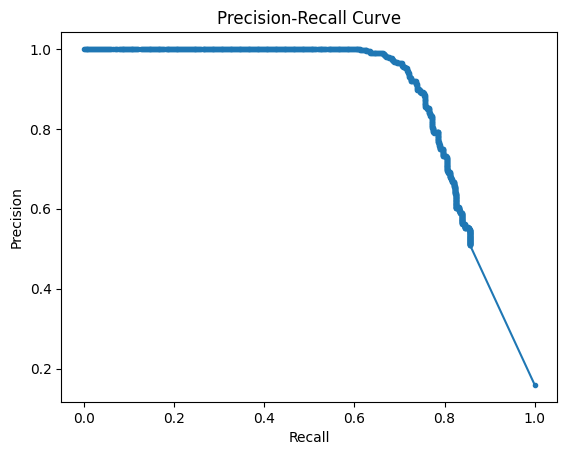

In [28]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Only for binary classification (adjust for multi-class)
precision, recall, thr = precision_recall_curve(y_true, y_pred)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


Text(0.5, 0, 'Threshold')

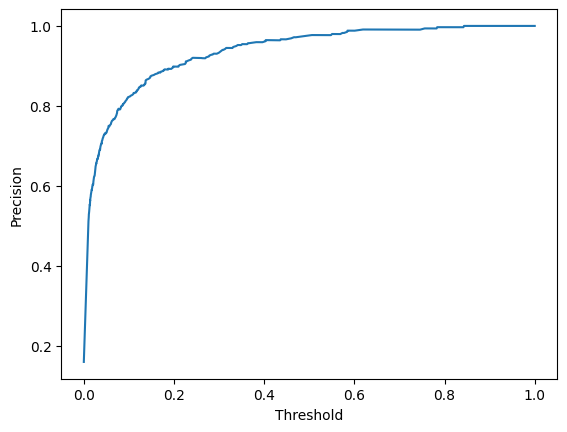

In [29]:
plt.plot(thr,precision[:-1])
plt.ylabel("Precision")
plt.xlabel("Threshold")

Text(0.5, 0, 'Threshold')

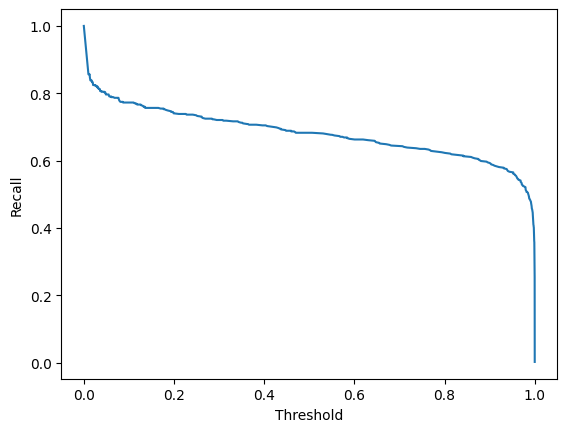

In [30]:
plt.plot(thr, recall[:-1])
plt.ylabel("Recall")
plt.xlabel("Threshold")

In [31]:

#preds_negative = {k: predictions[k] for k in wav_files if k in predictions}

In [32]:
#preds_negative = np.array(list(preds_negative.values()))